# Credit Score Classification
## Постановка задачи
Вы работаете специалистом по обработке данных в глобальной финансовой компании. На протяжении многих лет компания собирала основные банковские реквизиты и собрала много информации, связанной с кредитом. Руководство хочет создать интеллектуальную систему для разделения людей по группам кредитных баллов, чтобы сократить ручные усилия.
## Задача
Учитывая информацию, связанную с кредитом человека, создайте модель машинного обучения, которая может классифицировать кредитный рейтинг.

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import re 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
import joblib

## Читаем данные

In [196]:
df = pd.read_csv('./train.csv', low_memory=False)

In [26]:
df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
80038,0x1eaf8,CUS_0x4032,July,Suzanne Barlynk,33,836-72-3680,Doctor,15126.8,1019.566667,6,...,Bad,1424.74,31.472441,18 Years and 5 Months,Yes,17.724191,38.55545735569958,!@9#%8,315.67701862931386,Standard
22895,0x9c25,CUS_0xd0c,August,Kiharap,22,191-87-1257,Musician,47953.86,3706.155000,7,...,Standard,1601.8,36.881126,7 Years and 6 Months,Yes,80.923860,103.78728258565269,High_spent_Medium_value_payments,435.9043571460279,Poor
75164,0x1ce6a,CUS_0x3463,May,NaN,27,782-87-8295,Scientist,59110.84,5210.903333,4,...,_,2685.23,31.578757,12 Years and 9 Months,Yes,106.662454,136.3479943187487,Low_spent_Large_value_payments,548.0798848001789,Poor
49095,0x135a9,CUS_0x845d,August,Aubinx,46,694-27-8258,Accountant,37731.42,3206.285000,1,...,Good,1204.17,32.860477,20 Years and 6 Months,No,41584.000000,129.6899875748009,High_spent_Medium_value_payments,440.9385124251991,Poor
29013,0xbfff,CUS_0x59b6,June,Scuffhamk,53,315-03-3600,Writer,111090.06,NaN,0,...,Good,575.32,38.493104,27 Years and 10 Months,NM,149.079658,446.0375859689788,High_spent_Small_value_payments,584.1332557012743,Good


In [27]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Описание датасета
### Колонки и их описание
**ID** - представляет уникальную идентификацию записи <br>
**Customer_ID** - представляет собой уникальную идентификацию человека <br>
**Month** - представляет месяц года <br>
**Name** - представляет имя человека <br>
**Age** - представляет возраст человека <br>
**SSN** - представляет номер социального страхования человека <br>
**Occupation** - представляет род занятий человека <br>
**Annual_Income** - представляет собой годовой доход лица <br>
**Monthly_Inhand_Salary** - представляет собой месячную базовую заработную плату человека <br>
**Num_Bank_Accounts** - представляет количество банковских счетов, которыми владеет человек <br>
**Num_Credit_Card** - представляет количество других кредитных карт, имеющихся у человека <br>
**Interest_Rate** - представляет собой процентную ставку по кредитной карте <br>
**Num_of_Loan** - представляет собой количество кредитов, взятых в банке <br>
**Type_of_Loan** - представляет виды займов, взятых лицом <br>
**Delay_from_due_date** - представляет среднее количество дней задержки с даты платежа <br>
**Num_of_Delayed_Payment** - представляет среднее количество платежей, задержанных лицом <br>
**Changed_Credit_Limit** - представляет процентное изменение лимита кредитной карты <br>
**Num_Credit_Inquiries** - представляет количество запросов по кредитным картам <br>
**Credit_Mix** - представляет собой классификацию сочетания кредитов <br>
**Outstanding_Debt** - представляет собой оставшийся долг, подлежащий выплате (в долларах США) <br>
**Credit_Utilization_Ratio** - представляет собой коэффициент использования кредитной карты <br>
**Credit_History_Age** - представляет собой возраст кредитной истории лица <br>
**Payment_of_Min_Amount** - показывает, была ли выплачена лицом только минимальная сумма <br>
**Total_EMI_per_month** - представляет собой ежемесячные платежи EMI (в долларах США) <br>
**Amount_invested_monthly** - представляет собой ежемесячную сумму, инвестированную клиентом (в долларах США) <br>
**Payment_Behaviour** - представляет платежное поведение клиента (в долларах США) <br>
**Monthly_Balance** - представляет собой ежемесячную сумму баланса клиента (в долларах США) <br>
**Credit_Score** - представляет собой скобку кредитного рейтинга (Плохой, стандартный, Хороший)

In [28]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

по вышеприведенной информации видно, что в датасете присутствуют пропущенные значения, также видно, что есть колонки, чей тип не соответствует действительности

In [30]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

В колонке Num_Bank_Accounts минимальное значение это -1, что не соответствует действительности

In [31]:
df[df['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].value_counts()

-1    21
Name: Num_Bank_Accounts, dtype: int64

In [32]:
df['Num_Bank_Accounts'].replace(-1,1,inplace=True)

В колонке Delay_from_due_date также есть отрицательные значения, которые не соответствуют действительности

In [34]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].value_counts()

-1    210
-2    168
-3    118
-4     62
-5     33
Name: Delay_from_due_date, dtype: int64

In [36]:
df['Delay_from_due_date'].replace([-1, -2, -3, -4, -5],1,inplace=True)

## Визуализация данных

<AxesSubplot:>

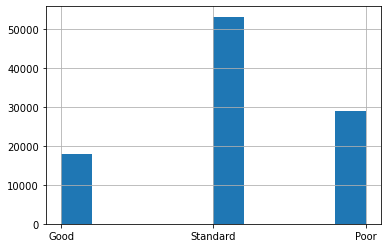

In [41]:
df["Credit_Score"].hist()

По гистограмме видно, что классы распределены неравномерно

<AxesSubplot:>

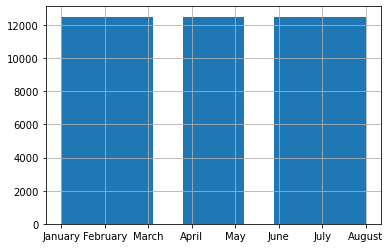

In [43]:
df['Month'].hist()

По данной гистограмме видно, что данные брались для каждого человека за 8 определенных месяцев

In [46]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

По данным видим одно непонятное значение, очевидно, что здесь пропущено название какой то профессии

<AxesSubplot:>

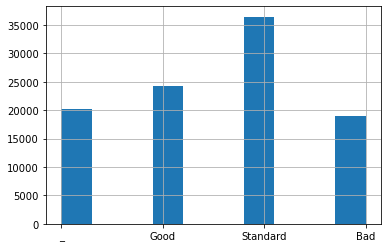

In [53]:
df['Credit_Mix'].hist()

По данному графику видно, что здесь присутствует значение, суть которого не ясна и впоследствии его следует обработать

<AxesSubplot:>

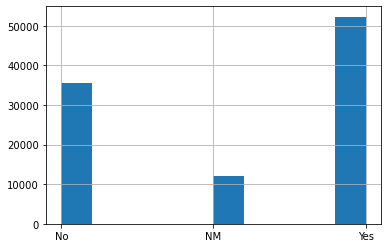

In [55]:
df['Payment_of_Min_Amount'].hist()

Здесь также присутствует странное значение, так как данная колонка предпологает значение ДА или НЕТ, данное значение будет обработано как НЕТ

<AxesSubplot:>

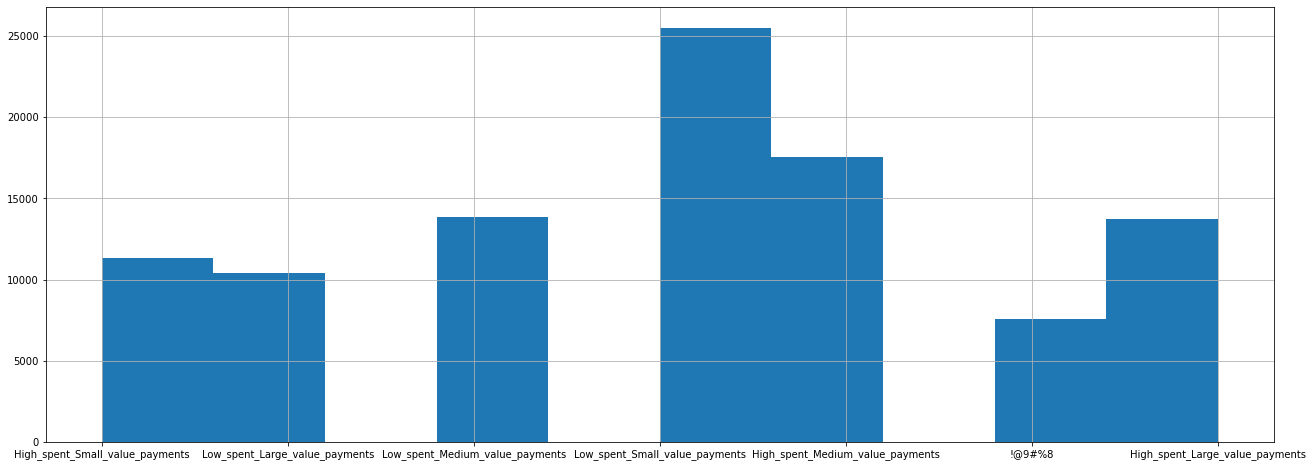

In [57]:
df['Payment_Behaviour'].hist(figsize=(22, 8))

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

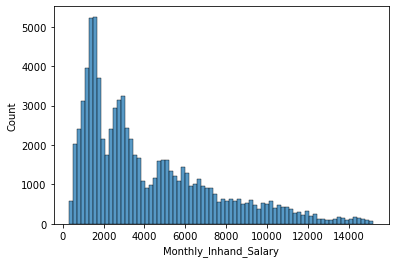

In [59]:
sns.histplot(df['Monthly_Inhand_Salary'])

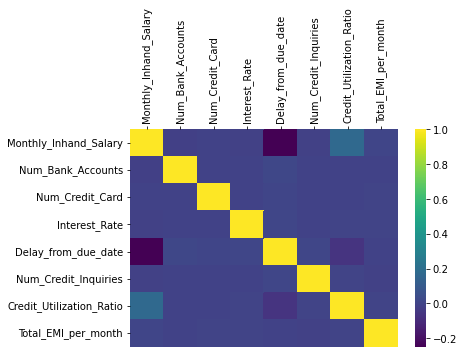

In [66]:
g = sns.heatmap(data=df.corr(), cmap='viridis') 
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

По данному графику видим, что столбцы слабо коррелируют между собой

## Предобработка данных

In [157]:
df.shape

(100000, 28)

Удалим колонки, которые не несут полезной информации для нашей задачи

In [197]:
df = df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan'], axis=1)

In [198]:
df.shape

(100000, 22)

Преобразуем колонки типа object, котрые должны быть числовыми

In [199]:
def transform_to_int(num):
    try:
        return int(num.replace("_",""))
    except:
        return np.nan

In [200]:
def transform_to_float(num):
    try:
        return float(num.replace("_",""))
    except:
        return np.nan

Age, Num_of_Loan, Num_of_Delayed_Payment

In [201]:
df['Age'] = df['Age'].apply(transform_to_int)
df['Num_of_Loan'] = df['Num_of_Loan'].apply(transform_to_int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(transform_to_int)

Annual_Income, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt, Monthly_Balance

In [202]:
df['Annual_Income'] = df['Annual_Income'].apply(transform_to_float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(transform_to_float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(transform_to_float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(transform_to_float)
df['Monthly_Balance'] = df['Monthly_Balance'].apply(transform_to_float)

Credit_History_Age

In [203]:
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [204]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

Устраняем ранее найденные непонятные значения

In [206]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [207]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [208]:
template = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [209]:
df['Credit_Mix'] = df['Credit_Mix'].map(template)

In [210]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [211]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                79805 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

## Заполнение пропущенных значений

In [213]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [214]:
col_with_null = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                 'Credit_Mix', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

In [215]:
for col in col_with_null:
    imputer.fit(df[[col]])
    df[[col]] = imputer.transform(df[[col]])

In [216]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  float64
 13  Outstanding_Debt          100000 non-null  fl

## Обработка категориальных признаков

In [218]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [219]:
template = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [220]:
df['Credit_Score'] = df['Credit_Score'].map(template)

In [221]:
df = pd.get_dummies(df,drop_first=True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  int64  
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  int64  
 4   Num_Credit_Card                                     100000 non-null  int64  
 5   Interest_Rate                                       100000 non-null  int64  
 6   Num_of_Loan                                         100000 non-null  int64  
 7   Delay_from_due_date                                 100000 non-null  int64  
 8   Num_of_Delayed_Payment                              100000 non-nu

## Разделение данных

In [223]:
y = df["Credit_Score"]

In [224]:
X = df.drop("Credit_Score",axis=1)

In [225]:
scaler = StandardScaler()

In [226]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

## Обучение

# KNN

In [270]:
knn = KNeighborsClassifier()

In [272]:
parametrs = {'n_neighbors': [i for i in range(3, 15, 3)]}

In [273]:
grid_search_cv = GridSearchCV(knn, parametrs, cv=5)

In [274]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 6, 9, 12]})

In [275]:
grid_search_cv.best_params_

{'n_neighbors': 12}

In [276]:
best_knn = grid_search_cv.best_estimator_

In [277]:
y_pred = best_knn.predict(X_test)
y_pred_train = best_knn.predict(X_train)

In [278]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65     17323
           1       0.80      0.70      0.74     42653
           2       0.47      0.59      0.53     10024

    accuracy                           0.68     70000
   macro avg       0.62      0.66      0.64     70000
weighted avg       0.70      0.68      0.69     70000



In [279]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57      7287
           1       0.75      0.65      0.69     18416
           2       0.40      0.49      0.44      4297

    accuracy                           0.62     30000
   macro avg       0.56      0.59      0.57     30000
weighted avg       0.64      0.62      0.63     30000



# Random forest

In [280]:
rf = RandomForestClassifier()

In [281]:
parametrs = {'n_estimators': [i for i in range(10, 30, 3)], 'max_depth': [i for i in range(3, 11, 2)]}

In [282]:
grid_search_cv = GridSearchCV(rf, parametrs, cv=5)

In [283]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 13, 16, 19, 22, 25, 28]})

In [284]:
grid_search_cv.best_params_

{'max_depth': 9, 'n_estimators': 28}

In [285]:
best_rf = grid_search_cv.best_estimator_

In [286]:
y_pred_rf = best_rf.predict(X_test)

In [287]:
y_pred_train_rf = best_rf.predict(X_train)

In [288]:
print(classification_report(y_pred_train_rf,y_train))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71     18191
           1       0.76      0.76      0.76     36865
           2       0.70      0.59      0.64     14944

    accuracy                           0.72     70000
   macro avg       0.71      0.70      0.70     70000
weighted avg       0.72      0.72      0.72     70000



In [289]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      7753
           1       0.74      0.75      0.75     15754
           2       0.69      0.56      0.62      6493

    accuracy                           0.71     30000
   macro avg       0.70      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



Удалось добиться точности в 71 процент, используя случайный лес, в силу того, что точность предсказания класса 1 выше, чем у остальных и его количество в выборке также больше, то такой результат объясняется несбалансированностью классов